In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sjoert.stellar
import pandas as pd
import os
from tqdm import tqdm
from forced_phot import q_cuts,field_check,filter_split,flux_unc_val
from astropy import coordinates as coord
from forced_phot import flux_jy
from scipy.optimize import curve_fit
from astropy.stats import bayesian_blocks
from scipy.signal import find_peaks, peak_prominences

sjoertpath = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\Sjoert_Flares'

(167,) (493,)


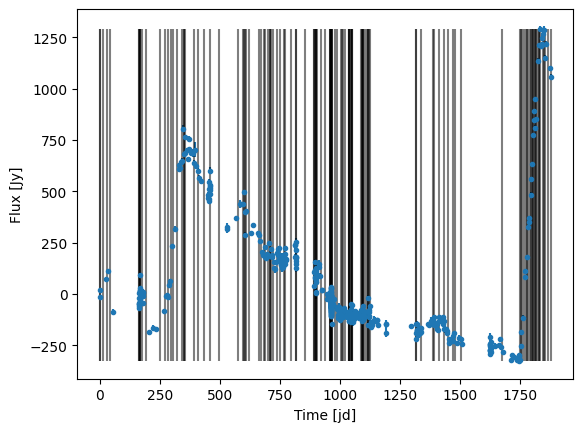

In [53]:

# testpath = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\Sjoert_Flares\ZTF18abjjkeo\clean_ZTF_r_batchfp_req0000338730_lc.txt'
# testpath = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\Sjoert_Flares\ZTF18aauosxv\clean_ZTF_r_batchfp_req0000338734_lc.txt'
# testpath = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\Sjoert_Flares\ZTF18aavummp\clean_ZTF_r_batchfp_req0000338750_lc.txt'
# testpath = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\Sjoert_Flares\ZTF18aajupnt\clean_ZTF_r_batchfp_req0000338755_lc.txt'
testpath = r'C:\Users\timvd\Documents\Uni 2023-2024\First Research Project\Data\Sjoert_Flares\ZTF19aaejtoy\clean_ZTF_r_batchfp_req0000338737_lc.txt'

ztf_name = testpath[len(sjoertpath)+1:-41]

testfile = r'clean_ZTF_r_batchfp_req0000338730_lc.txt'
testdata = pd.read_csv(testpath,delimiter=' ')

time = testdata['time']
flux,err = flux_jy(testdata)
flux = flux.values
maxtime = time.iloc[np.argmax(flux)]
maxflux = np.max(flux)

time = time.values


bounds = bayesian_blocks(time,flux,err,fitness='measures')
print(bounds.shape,time.shape)
plt.errorbar(time,flux,err,fmt='.')
# plt.hist(flux,25)
# plt.scatter(time[1:],np.diff(flux),s=4,c='red')
plt.ylabel("Flux [Jy]")
plt.xlabel('Time [jd]')
plt.vlines(bounds,min(flux),max(flux),colors='black',alpha=0.5)
plt.show()